# Lab 2 - Prediction and Classification
## CAP 5771 - Principles of Data Mining

    Poonam Gupta

## Instructions

Please complete this lab assignment. Follow along carefully and answer all questions. Coding tasks should be coded inline within the jupyter notebook. No additional files are need or accepted unless otherwise noted. All data files can be found in the data folder on the github repo. Please read the contents of each section, as well as the comments in each cell. Add your code where it says 'Insert your code here'. Also, please be sure to answer any questions inline in markdown.

## Objectives

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). It contains 32 observations and 11 variables. A description of the variables is as follows:
- mpg: Miles/(US) gallon
- cyl: Number of cylinders
- disp: Displacement (cu.in.)
- hp: Gross horsepower
- drat: Rear axle ratio
- wt: Weight (1000 lbs)
- qsec: 1/4 mile time
- vs: Engine shape: (0 = V-shape, 1 = straight)
- am: Transmission (0 = automatic, 1 = manual)
- gear: Number of forward gears
- carb: Number of carburetors

The objectives of this lab are to a) build a set of different regression models to predict the MPG given a set of features and 2) build a set of different classification models to classify cars into high-efficiency or low-efficiency vehicles.

By the end of this lab, you should be able to:

1. Build a regression model for prediction miles per gallon of the Motor Trends Car Roadtest Dataset
2. Build a classification model for classifying cars as high-efficient or low-efficient
3. Determine the important features used to classify cars into efficiency categories

## Part 1: Regression
### Part 1a: Simple linear regression

For this part of lab 2, you will build a simple linear regression using both statsmodels and sklearn, using Motor Trend US Magazine dataset. Select one feature from the dataset to use as the input to the model in order to predict the miles per gallon. Be sure to split your dataset into a training and testing dataset. 

In [1]:
## import the required packages
####### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.close('all')
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#######

In [2]:
# load the motor trends car dataset. the dataset file is located in the data folder.
# it is called 'mtcdata.csv'
####### 
df= pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Lab 2\\mtcdata.csv")
df[:2]
#######

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [3]:
# split the dataset into a training and testing dataset
####### 
x=df["hp"].values.reshape(-1,1)
y=df["mpg"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
#######

In [4]:
# build a linear model using statsmodels 
####### 
x_train_c=sm.add_constant(x_train)
x_test_c=sm.add_constant(x_test)
model = sm.OLS(y_train,x_train_c).fit()
predictions = model.predict(x_test_c)
print(predictions)
print(model.summary())
#print(model.params)
print("Mean square error is: ",model.mse_total)

#######

[21.64417516 21.81753542 19.50606527 25.16916715 14.01632365 24.36015259
 19.50606527]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     34.05
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           6.03e-06
Time:                        15:44:08   Log-Likelihood:                -64.964
No. Observations:                  25   AIC:                             133.9
Df Residuals:                      23   BIC:                             136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [5]:
# build a linear model using sklearn 
####### 
reg=LinearRegression() # create a model
model1=reg.fit(x_train, y_train) # fit a model
#print(x_test)
y_pred=model1.predict(x_test)
print(y_pred)
print("Linear regression score: %f " % reg.score(x_train, y_train))
print("Linear model coefficients: %f " % reg.coef_)
print("Linear model y intercept: %f " % reg.intercept_)
print("Mean square error is: ",mean_squared_error(y_test,y_pred))
#######

[21.64417516 21.81753542 19.50606527 25.16916715 14.01632365 24.36015259
 19.50606527]
Linear regression score: 0.596842 
Linear model coefficients: -0.057787 
Linear model y intercept: 28.174078 
Mean square error is:  29.134777098686293


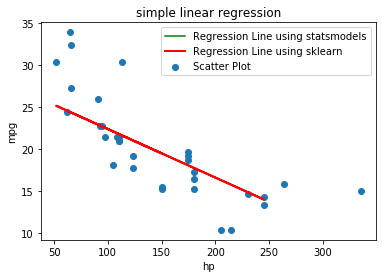

In [6]:
# plot the testing set as a scatter plot, along with the lines for each of the linear models, one from 
# statsmodels, and one from sklearn. be sure to add labels to the x and y axis, as well as,
# a legend. also, be sure to print out the mean square error for each model on the testing set.
plt.scatter(x,y,label='Scatter Plot')
plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.plot(x_test,predictions,color='green',label='Regression Line using statsmodels')
plt.plot(x_test,y_pred,color='red',linewidth=2,label='Regression Line using sklearn')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('simple linear regression')
plt.legend()
plt.show()

How do the models compare? In other words, take a look at the coefficients and intercept of the model. How far off are they from each other? Is there another feature that may be better for predicting miles per gallon? How does the performance of the models on the testing set improve by using this feature? By using both features?

### Both models produce same coefficients and  y intercepts. Yes, there is a possibility that the feature Number of cylinders or weight may be better in predicting overall miles per gallon. we also observed that the size of the training set also effects the results.

### Part 1b: Complex model regression: Random Forest Regression, SVM Regression, ANN Regression, Gradient Boosted Decision Tree Regression

Repeat the exercise for part 1a, but using the following forms of regession:
- Random Forest Regression
- SVM Regression
- ANN Regression
- Gradient Boosted Decision Tree Regression

You can read more about these types of regression models from the sklearn documentation [here.](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

How do the results compare based on MSE on the testing data?

In [7]:
# build a random forest regression, SVM regression, ANN regression, Gradient Boosted Decision Tree Regression 

####### 
####### 
#   Insert your code
#print("x_test")
#print(x_test)
#print()
###### Gradient Boosted Decision Tree Regression
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg1.fit(x_train,y_train)
gradboost_predict = reg1.predict(x_test)
#print("Gradient Boosted Decision Tree")
#print(gradboost_predict)


###### Random Forest Regressor
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg2.fit(x_train,y_train)

randomforest_predict = reg2.predict(x_test)
#print("Random Forest")
#print(randomforest_predict)

###### Linear regression
reg3 = LinearRegression()
reg3.fit(x_train,y_train)
linear_predict = reg3.predict(x_test)
#print("Linear")
#print(linear_predict)

######SVM
reg4 = SVR(C=1.0, epsilon=0.2)
reg4.fit(x_train,y_train)
svm_predict = reg4.predict(x_test)
#print("SVM")
#print(svm_predict)

###### ANN
tree = DecisionTreeRegressor()
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, max_iter=500, random_state=0))
tree.fit(x_train,y_train)
mlp.fit(x_train,y_train)
#######

C:\Users\poonam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 100),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=500,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.01, validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)

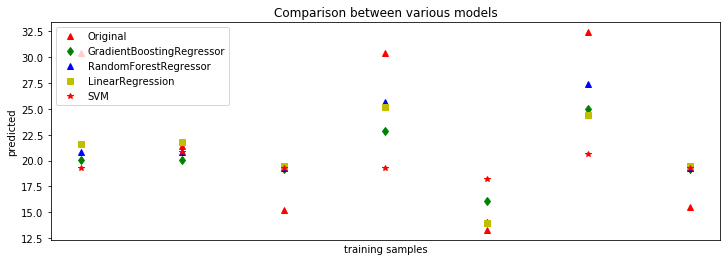

In [8]:
### plot all models
plt.figure()
plt.plot((y_test),'r^',label='Original')
plt.plot(gradboost_predict, 'gd', label='GradientBoostingRegressor')
plt.plot(randomforest_predict, 'b^', label='RandomForestRegressor')
plt.plot(linear_predict, 'ys', label='LinearRegression')
plt.plot(svm_predict, 'r*', label='SVM')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison between various models')
plt.show()

In [9]:
print("Mean square error for Gradient Boosted Decision Tree Regression: ",mean_squared_error(y_test,gradboost_predict))
print("Mean square error for Random Forest Regressor: ",mean_squared_error(y_test,randomforest_predict))
print("Mean square error for Linear regression: ",mean_squared_error(y_test,linear_predict))
print("Mean square error for SVM: ",mean_squared_error(y_test,svm_predict))

Mean square error for Gradient Boosted Decision Tree Regression:  36.83116684745441
Mean square error for Random Forest Regressor:  24.684926240079335
Mean square error for Linear regression:  29.134777098686293
Mean square error for SVM:  63.29146823318774


### In our tests here we can see that Random Forest Regressor has least MSE and SVM has most.

## Part 2: Classification

For part 2 of the lab, we will explore different classification techniques. First, however, we need to add labels to the dataset.

### Part 2a: Adding labels

Add a column to the motor trend car dataset that is called 'efficiency'. This will be a binary attribute, with a 0 indicating low-efficiency (those cars that have a MPG rating of less than 20 MPG) and a 1 indicating high-efficiency (those cars that have a MPG rating of greater than or equal to 20 MPG). You can do this in pandas, using the apply function and a lambda. See this [link](https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/) for an example.

In [10]:
# add efficiency labels to the dataset

####### 
df['efficiency']= df.apply(lambda x: 1 if x.mpg >=20 else 0,axis=1)
df[:5]
#######

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,efficiency
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


### Part 2b: Logistic Regression

Using sklearn, build a logistic regression model and train it on the data (Be sure to split your dataset into training and testing as before). You can use the same features as before, or choose new features, or use all of them! What is the final accuracy of the trained model when predicting efficiency on the testing dataset? What are your type I and type II errors? Additionally, please be sure to plot the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), as well as the [ROC-AUC curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

In [11]:
# build a logistic regression classifier
####### 
xlr=df.iloc[:,[1,2,4]].values
ylr=df["efficiency"].values
xlr_train,xlr_test,ylr_train,ylr_test=train_test_split(xlr,ylr,test_size=0.4,random_state=0)

logmodel=LogisticRegression()
logmodel.fit(xlr_train,ylr_train)
predictions=logmodel.predict(xlr_test)
#######

C:\Users\poonam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
classification_report(ylr_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.89      0.94         9\n           1       0.80      1.00      0.89         4\n\n    accuracy                           0.92        13\n   macro avg       0.90      0.94      0.92        13\nweighted avg       0.94      0.92      0.93        13\n'

In [13]:
cm=confusion_matrix(ylr_test,predictions)
cm

array([[8, 1],
       [0, 4]], dtype=int64)

In [14]:
print("Accuracy score :",accuracy_score(ylr_test,predictions))

Accuracy score : 0.9230769230769231


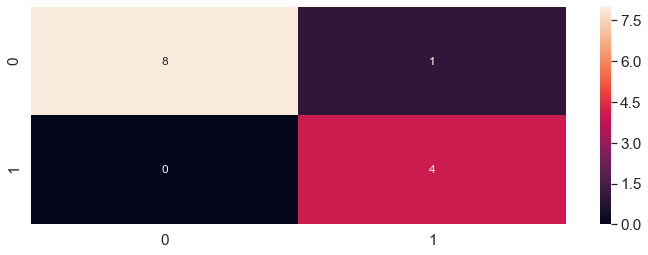

In [15]:
####Confusion matrix
sn.set(font_scale=1.4)
sn.heatmap(cm,annot=True,annot_kws={"size":12})
plt.show()

### Type I error = 0 Type II error = 1

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


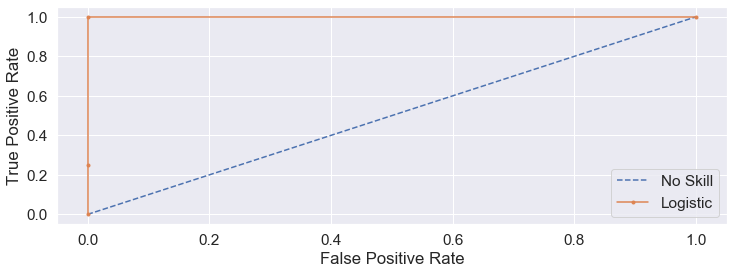

In [16]:
#########ROC-AUC curve
#xlr_train,xlr_test,ylr_train,ylr_test
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ylr_test))]

# predict probabilities
lr_probs = logmodel.predict_proba(xlr_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ylr_test, ns_probs)
lr_auc = roc_auc_score(ylr_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ylr_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ylr_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


### Part 2c: Random Forest Classification vs GBDT

Repeat part 2b, but using a [random forest classifier](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) and a [gradient boosted decision tree classifier](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting). Repeat the analysis and answer the same questions from part 2b.

In [17]:
# build a random forest classifier and a GBDT classifier using sklearn
####### 
model = RandomForestClassifier(n_estimators=10)
model.fit(xlr_train,ylr_train)
print("Model Score : ",model.score(xlr_test,ylr_test))
y_predicted=model.predict(xlr_test)
cm=confusion_matrix(ylr_test,y_predicted)
cm
#######

Model Score :  1.0


array([[9, 0],
       [0, 4]], dtype=int64)

In [18]:
print("Accuracy score :",accuracy_score(ylr_test,y_predicted))

Accuracy score : 1.0


Text(80.5, 0.5, 'Truth')

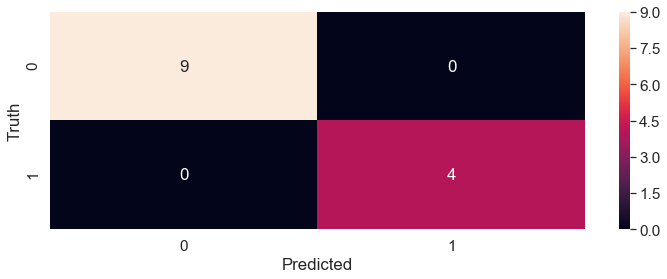

In [19]:
#plot of confusion matrix
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Type I error = 0 Type II error = 1

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


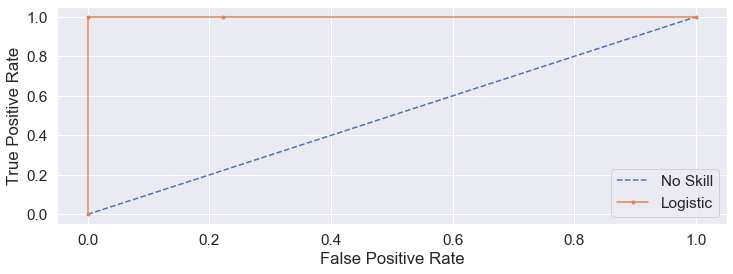

In [20]:
#######ROC-AUC curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ylr_test))]

# predict probabilities
lr_probs = model.predict_proba(xlr_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ylr_test, ns_probs)
lr_auc = roc_auc_score(ylr_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ylr_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ylr_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [21]:
###### GBDT classifier using sklearn
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,
     max_depth=1, random_state=0).fit(xlr_train, ylr_train)
y_predicted=clf.predict(xlr_test)

cm1=confusion_matrix(ylr_test,y_predicted)
cm1

array([[9, 0],
       [0, 4]], dtype=int64)

In [22]:
print("Accuracy score :",accuracy_score(ylr_test,y_predicted))

Accuracy score : 1.0


Text(80.5, 0.5, 'Truth')

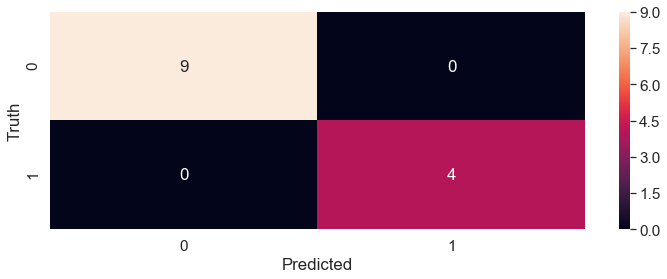

In [23]:
#####plot of confusion matrix
sn.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Type I error = 0 Type II error = 0

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


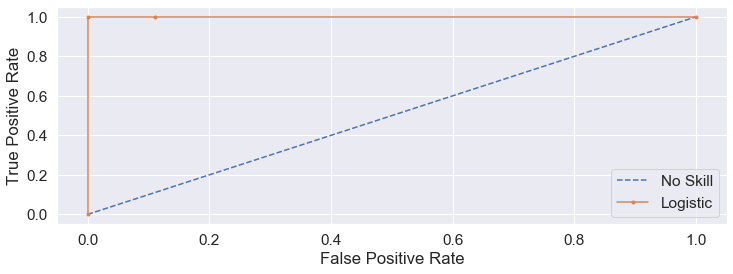

In [24]:
#####ROC-AUC curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ylr_test))]

# predict probabilities
lr_probs = clf.predict_proba(xlr_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ylr_test, ns_probs)
lr_auc = roc_auc_score(ylr_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ylr_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ylr_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()